# Analisis Descriptivo 

*columna* 1 -- id: es el indice
[text](https://github.com/adam-p/markdown-here/wiki/markdown-cheatsheet)


# ¡Empezamos a tratar datos!

## traigo las *librerias*



---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import seaborn as sns
# import plotly as ply


# Datos, *Datos*, **Datos**

##subido a mano


Si ejecuto esta celda y no he subido el archivo, obtendremos el siguiente error:
```
FileNotFoundError: [Errno 2] No such file or directory: '/content/chipotle.tsv'
```



In [12]:
chipo = pd.read_csv('data/chipotle.tsv', sep = '\t') #

In [9]:
print(type(chipo))
print(type('hola'))

<class 'pandas.core.frame.DataFrame'>
<class 'str'>


In [5]:
print(chipo)

      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Clementine]  

In [10]:
display(chipo)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


## ¿Y si quiero subirlo a mano? **PRO**

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

## Y si quiero traerlo desde Drive?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
chipo = pd.read_csv('/content/drive/MyDrive/csv/chipotle.tsv', sep = '\t')

¿Qué resultado obtenemos de la función read_csv de Pandas?

In [ ]:
print(type(chipo))

In [ ]:
display(chipo)

# Observar los datos por primera vez

## Primer vistazo a los datos y a [pandas](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

Los objetos de Pandas no son sencillos, tienen propiedades asociadas, además de los métodos o funciones que ya esperamos:

In [13]:
print(chipo.columns)
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
RangeIndex(start=0, stop=4622, step=1)


In [14]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [15]:
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

Podemos traer una columna:

In [16]:
display(chipo['choice_description'])
type(chipo['choice_description'])

0                                                     NaN
1                                            [Clementine]
2                                                 [Apple]
3                                                     NaN
4       [Tomatillo-Red Chili Salsa (Hot), [Black Beans...
                              ...                        
4617    [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...
4618    [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...
4619    [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...
4620    [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...
4621    [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...
Name: choice_description, Length: 4622, dtype: object

pandas.core.series.Series

Y de esa columna, una de las filas

In [18]:
chipo['choice_description'][421].upper()

'[FRESH TOMATO SALSA, [RICE, CHEESE, SOUR CREAM, LETTUCE]]'

¿Qué es una columna?

In [19]:
type(chipo['choice_description'])

pandas.core.series.Series

¿Podría traerme varias columnas?

In [20]:
chipo[ 'choice_description','item_name' ] # fíjate que sólo le estoy metiendo una variable a los corchetes de chipo, ¿de qué tipo es?

KeyError: ('choice_description', 'item_name')

In [21]:
chipo[ ['choice_description','item_name'] ] # fíjate que sólo le estoy metiendo una variable a los corchetes de chipo, ¿de qué tipo es?


,choice_description,item_name
0,NaN,Chips and Fresh Tomato Salsa
1,[Clementine],Izze
2,[Apple],Nantucket Nectar
3,NaN,Chips and Tomatillo-Green Chili Salsa
4,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",Chicken Bowl
...,...,...
4617,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",Steak Burrito
4618,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",Steak Burrito
4619,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",Chicken Salad Bowl
4620,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",Chicken Salad Bowl


In [22]:
type(chipo[ ['choice_description','item_name'] ])

pandas.core.frame.DataFrame

Existen funciones de agregación en Pandas!
También condicionales

¿Qué estamos haciendo en la siguiente celda?

In [27]:
chipo.count()

order_id              4622
quantity              4622
item_name             4622
choice_description    3376
item_price            4622
dtype: int64

Hemos visto la función display, que trata de mostrarnos la tabla entera, pero si es muy grande no lo hace...

¿Podría decirle a Pandas que sólo traiga los primeros registros o los últimos?

In [28]:
chipo.head() #tail

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [29]:
chipo['choice_description'][4]

'[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]'

# EDA

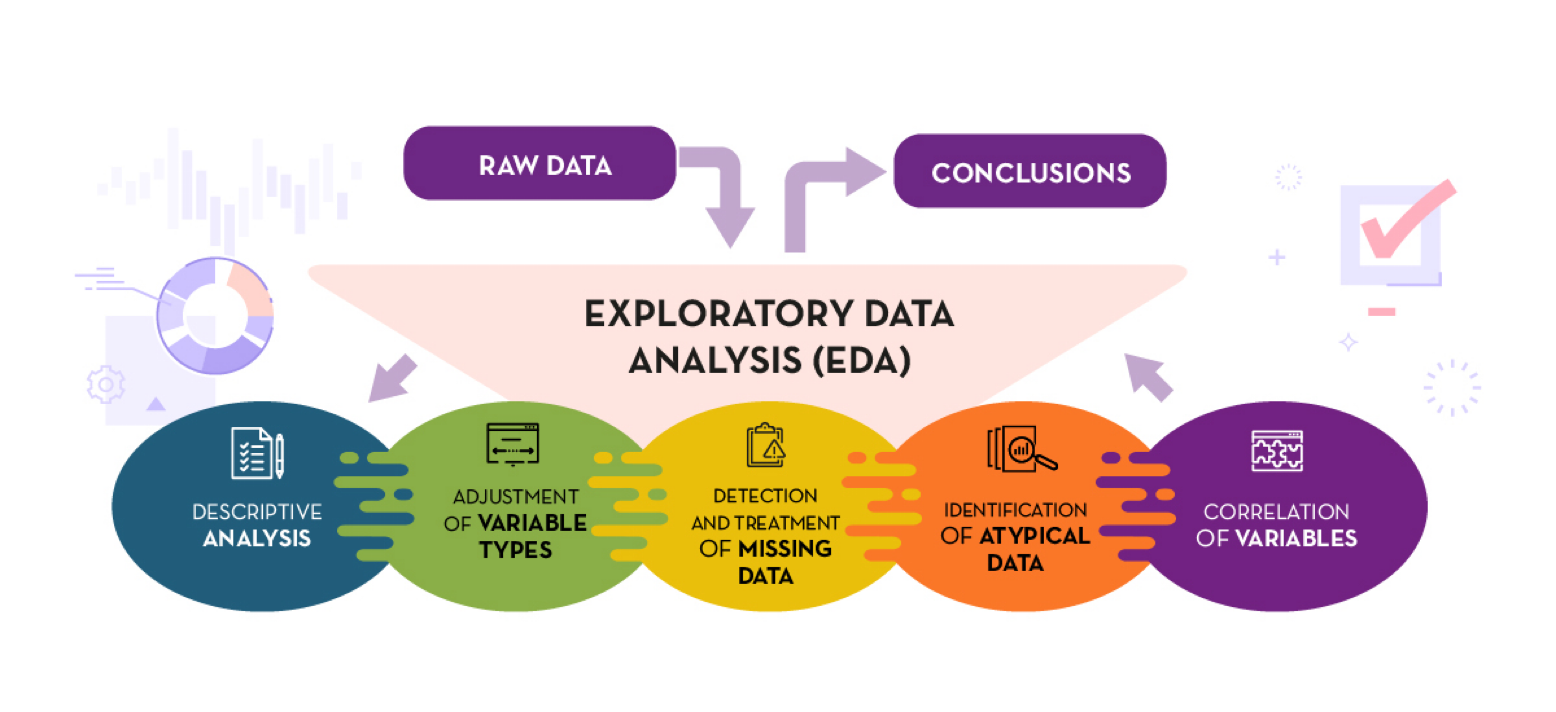

## Cambiar tipos de datos por columnas,

astype()

convert_dtypes()

¿Cómo son nuestros datos?

In [33]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   string
 3   choice_description  3376 non-null   string
 4   item_price          4622 non-null   object
dtypes: int64(2), object(1), string(2)
memory usage: 180.7+ KB


### Método 1

In [ ]:
chipo['item_name'] = chipo['item_name'].astype('string')
chipo['choice_description'] = chipo['choice_description'].astype('string')

### Método 2

In [ ]:
chipo = chipo.astype( {'item_name':'string',
                       'choice_description':'string'})

### Método 3

In [31]:
lista_string = ['choice_description','item_name']
chipo[lista_string  ] = chipo[ lista_string ].astype('string')

In [32]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   string
 3   choice_description  3376 non-null   string
 4   item_price          4622 non-null   object
dtypes: int64(2), object(1), string(2)
memory usage: 180.7+ KB


In [34]:
chipo = chipo.convert_dtypes()


In [35]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   Int64 
 1   quantity            4622 non-null   Int64 
 2   item_name           4622 non-null   string
 3   choice_description  3376 non-null   string
 4   item_price          4622 non-null   string
dtypes: Int64(2), string(3)
memory usage: 189.7 KB


In [40]:
display(chipo['item_name'].describe())
chipo['quantity'].describe()#['mean']

chipo[['item_name', 'item_price']].describe()#['quantity']

count             4622
unique              50
top       Chicken Bowl
freq               726
Name: item_name, dtype: object

,item_name,item_price
count,4622,4622
unique,50,78
top,Chicken Bowl,$8.75
freq,726,730


In [ ]:
chipo[['quantity', 'order_id']].plot(kind = 'box')

### Comprobamos
**Siempre** después de cada modificación que hemos cambiado lo que queríamos

In [ ]:
chipo.info()

In [ ]:
chipo.sum()

## Sacar info sencilla
* Información agregada
* Seleccionar columnas
* Seleccionar filas específicas
* ...

In [ ]:
['hola', 'adios']
['adios', 'hola']


In [ ]:
chipo

### Para sacar info por columnas
**¿puedo pasarle una variable, de qué tipos puede ser?**

In [ ]:
var = 'quantity'

var = ['choice_description', 'quantity', 'item_name']

chipo[ var ]

¿El orden en que aparecen las columnas viene dado por el orden en la tabla?

In [ ]:
lista_cols = ['choice_description', 'quantity']
chipo[lista_cols]

In [ ]:
chipo[ ['choice_description', 'item_name', 'quantity'] ]

### ¿Puedo coger subconjuntos de filas y columnas de mi tabla?

Claro, si somos lógicos

In [ ]:
chipo

In [ ]:
chipo.iloc[223:654, :2]

### Filtrar por filas, empezar a hacerle preguntas a los datos

In [ ]:
display(chipo.sum())

In [ ]:
chipo.isnull()#['order_id']
# chipo['order_id'].isnull()

In [ ]:
chipo.isnull().sum()

¿Qué me devuelve una comparación entre dos variables sencillas?

¿Y si comparo una variable más compleja contra una sencilla?

In [ ]:
print('6 > 1', 6 > 1)

print(chipo['quantity'])
print(chipo['quantity'] > 1)


In [ ]:
chipo['quantity'] == 1

In [ ]:
variable = chipo['quantity'].isnull()
type(variable)
display(variable)

chipo[ variable ] # chipo[ chipo['quantity'] > 1 ]


In [ ]:
chipo["choice_description"].notnull()

In [ ]:
chipo

In [ ]:
chipo[ chipo["choice_description"].isnull() ]

In [ ]:
filtro = chipo['item_name'] == 'Chips and Guacamole'
print(type(filtro))
print(filtro)


In [ ]:
chipo[filtro]

### Le podemos pedir a Pandas que nos describa los datos

Utilizaremos la función .describe() sobre una columna

¿Y si la utilizo sobre la tabla entera?

In [ ]:
serieOrderId = chipo['order_id'].describe()
print(serieOrderId)
type(serieOrderId)

In [ ]:
print(serieOrderId['75%'])
print(serieOrderId['25%'])

In [ ]:
print(chipo['order_id'].quantile(0.25))
chipo['order_id'].mean()

In [ ]:
chipo['Juan'] = 4*chipo['quantity']
chipo['Rosa'] = 9*chipo['quantity']
# chipo[['Rosa','Juan']] = 4*chipo['quantity'], 9

display(chipo)

**No siempre tiene sentido ponernos a hacer medias y estudios sobre todas las columnas numéricas.**

¿Por qué puede no tener sentido?

## Limpieza de los datos

### Outliers, suposiciones y ser ingeniero

In [41]:
serieQuantity = chipo['quantity'].describe()
print(serieQuantity)
type(serieQuantity)


count      4622.0
mean     1.075725
std      0.410186
min           1.0
25%           1.0
50%           1.0
75%           1.0
max          15.0
Name: quantity, dtype: Float64


pandas.core.series.Series

Definimos el IQR de una columna específica

In [42]:
iqr = serieQuantity['75%'] - serieQuantity["25%"]
print(iqr)

0.0


¿Qué estamos calculando aquí?

In [43]:

maxx = serieQuantity["75%"]+1.5*iqr # Q3+ 1.5IQR
print(maxx)
minn = serieQuantity["25%"]-1.5*iqr
print(minn) # bigote inferior


1.0
1.0


Comprobamos si hay outliers por debajo del mínimo calculado

In [ ]:
chipo['quantity']

In [44]:
filtro1 = chipo['quantity'] < minn
filtro1

0       False
1       False
2       False
3       False
4       False
        ...  
4617    False
4618    False
4619    False
4620    False
4621    False
Name: quantity, Length: 4622, dtype: boolean

In [45]:
chipo[filtro1]

,order_id,quantity,item_name,choice_description,item_price


Comprobamos si hay outliers por encima del máximo calculado

In [46]:
filtro2 = chipo['quantity'] > maxx # valores que están por encima del bigote superior
filtro2

0       False
1       False
2       False
3       False
4        True
        ...  
4617    False
4618    False
4619    False
4620    False
4621    False
Name: quantity, Length: 4622, dtype: boolean

In [47]:
chipo[filtro2]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
18,9,2,Canned Soda,[Sprite],$2.18
51,23,2,Canned Soda,[Mountain Dew],$2.18
135,60,2,Chicken Salad Bowl,"[Tomatillo Green Chili Salsa, [Sour Cream, Che...",$22.50
148,67,2,Steak Burrito,"[Tomatillo-Red Chili Salsa (Hot), [Rice, Chees...",$17.98
...,...,...,...,...,...
4491,1786,4,Canned Soft Drink,[Sprite],$5.00
4499,1789,2,Canned Soft Drink,[Coke],$2.50
4560,1812,2,Canned Soft Drink,[Coke],$2.50
4561,1813,2,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$17.50


<Axes: ylabel='Frequency'>

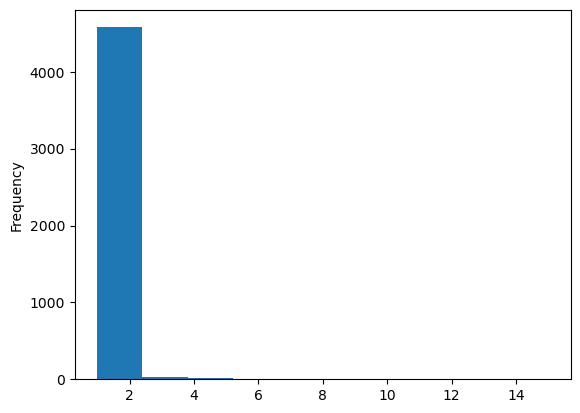

In [48]:
chipo['quantity'].plot.hist()

<Axes: >

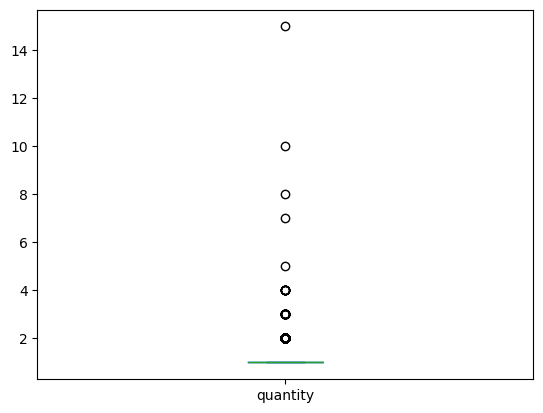

In [49]:
chipo['quantity'].plot.box()


In [51]:
chipo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   Int64 
 1   quantity            4622 non-null   Int64 
 2   item_name           4622 non-null   string
 3   choice_description  3376 non-null   string
 4   item_price          4622 non-null   string
dtypes: Int64(2), string(3)
memory usage: 189.7 KB


In [ ]:
chipo.describe()[4:5]

In [ ]:
print(chipo.describe().loc['25%'])
Q1 = chipo.describe().loc['25%']
print(chipo.describe().loc['75%'])
Q3 = chipo.describe().loc['75%']
print(chipo.describe().loc['75%'] - chipo.describe().loc['25%'])
IQR = chipo.describe().loc['75%'] - chipo.describe().loc['25%']

In [ ]:
IQR
MIN = Q1-1.5*IQR
MAX = Q3+1.5*IQR
print('Minimos\n', MIN)
print('Maximos\n',MAX)

In [ ]:
chipo[ chipo['quantity'] > 1]

### Cargarnos datos nulos

In [52]:
display(chipo.dropna()) #26-27 %
print(1 - 3376/4622)

,order_id,quantity,item_name,choice_description,item_price
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


0.269580268282129


In [53]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,<NA>,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,<NA>,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Reemplazar cosas y tal y cual

Recordamos cómo utilizamos la función replace

In [55]:
dolar = ' $17.50'
dolar = dolar.replace('¥', '')
dolar = dolar.replace('$', '')
dolar = dolar.replace('€', '')
#dolar = dolar[1:]
print(dolar)

 17.50


In [56]:
# chipo['item_price']
chipo.item_price

0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: string

In [57]:
chipo.item_price.describe()

count       4622
unique        78
top       $8.75 
freq         730
Name: item_price, dtype: object

In [58]:
float('$8.75 '.replace('$', '').replace(' ', ''))
float('$8.75 '[1:-1])


8.75

In [ ]:
chipo.item_price[1:-1]
chipo['item_price'][765:]


1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
5       $10.98 
         ...   
4616     $4.45 
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
Name: item_price, Length: 4620, dtype: string

¿Funciona replace como esperamos aquí?

In [63]:
chipo.item_price.replace('$2.39 ', 'loqueyodig')

0       loqueyodig
1           $3.39 
2           $3.39 
3       loqueyodig
4          $16.98 
           ...    
4617       $11.75 
4618       $11.75 
4619       $11.25 
4620        $8.75 
4621        $8.75 
Name: item_price, Length: 4622, dtype: string

***pero entonces cómo hago que funcione!?!?!?!?!?!***

In [64]:
chipo.item_price.str.replace('$', '')

0        2.39 
1        3.39 
2        3.39 
3        2.39 
4       16.98 
         ...  
4617    11.75 
4618    11.75 
4619    11.25 
4620     8.75 
4621     8.75 
Name: item_price, Length: 4622, dtype: string

In [65]:
chipo.item_price.str.replace('$', '').astype('float')#.sum()

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [66]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,<NA>,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,<NA>,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [67]:
chipo.item_price = chipo.item_price.str.replace('$', '').astype('float')

In [69]:
chipo.item_price.describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

## Una vez limpios los datos, podemos ponernos a jugar con ellos!

In [ ]:
chipo.item_price.describe()

In [70]:
serieItemPrice = chipo['item_price'].describe()
print(serieItemPrice)
type(serieItemPrice)


count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64


pandas.core.series.Series

In [71]:
q1 = serieItemPrice['25%']
q3 = serieItemPrice['75%']
iqr = q3-q1


Ahora calculamos 'máximo' y 'mínimo' de nuestra distribución

In [72]:
maximoPrice = q3 + 1.5*iqr
minimoPrice = q1 - 1.5*iqr

print('El máximo de nuestra distribución es', maximoPrice)
print('El mínimo de nuestra distribución es', minimoPrice)

El máximo de nuestra distribución es 18.04
El mínimo de nuestra distribución es -5.399999999999999


Aplicamos los filtros para ver si hay algún outlier

In [73]:
filtroMax = chipo['item_price'] > maximoPrice
filtroMin = chipo['item_price'] < minimoPrice

display(chipo[filtroMax])
display(chipo[filtroMin])

,order_id,quantity,item_name,choice_description,item_price
135,60,2,Chicken Salad Bowl,"[Tomatillo Green Chili Salsa, [Sour Cream, Che...",22.50
213,94,2,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",22.50
281,123,2,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Black Beans, Chee...",23.78
353,152,2,Steak Burrito,"[Fresh Tomato (Mild), [Lettuce, Guacamole, Ric...",22.16
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94
445,193,3,Bowl,"[Braised Carnitas, Pinto Beans, [Sour Cream, C...",22.20
506,212,2,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",23.50
534,223,2,Steak Burrito,"[Fresh Tomato Salsa, [Sour Cream, Lettuce, Che...",18.50
549,229,2,Steak Burrito,"[Fresh Tomato (Mild), [Lettuce, Guacamole, Ric...",22.16
591,243,2,Chicken Salad Bowl,"[Tomatillo Green Chili Salsa, [Black Beans, So...",22.50


,order_id,quantity,item_name,choice_description,item_price


Observamos que tenemos muchos valores por encima del máximo (*1147*) y otros tantos por debajo del mínimo (*1117*)

**¿Qué puede estar pasando?**

**¿Qué hemos estado suponiendo en todo momento?**



## Echarle un vistazo a los datos modificados


> Vemos qué pinta tienen los datos...



### Podemos hacer gráficas de nuestros datos?

Gráficas de pandas, útiles y rápidas, poco interactivas

<Axes: ylabel='Frequency'>

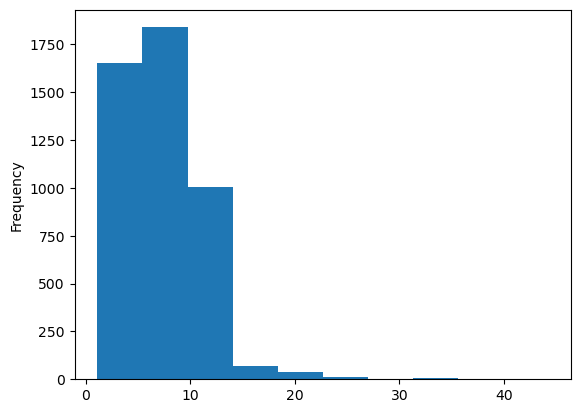

In [74]:
chipo['item_price'].plot(kind='hist')


<Axes: ylabel='Frequency'>

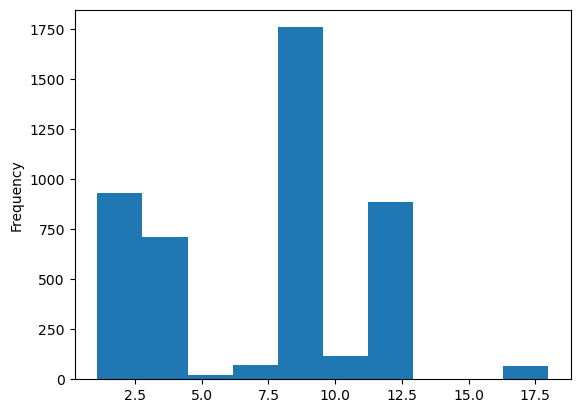

In [75]:
filtroMax = chipo['item_price'] < maximoPrice

#display(chipo[filtroMax])

chipo[filtroMax]['item_price'].plot(kind='hist')


<Axes: >

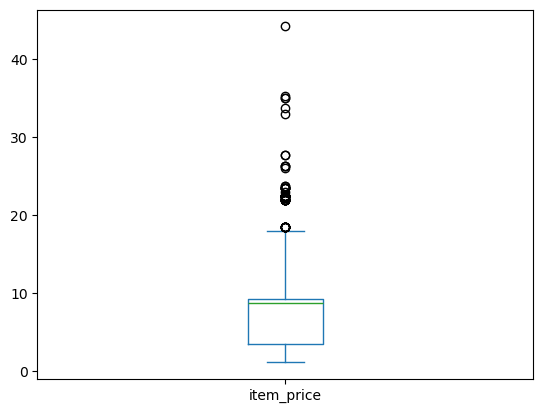

In [76]:
chipo['item_price'].plot(kind='box')

<Axes: >

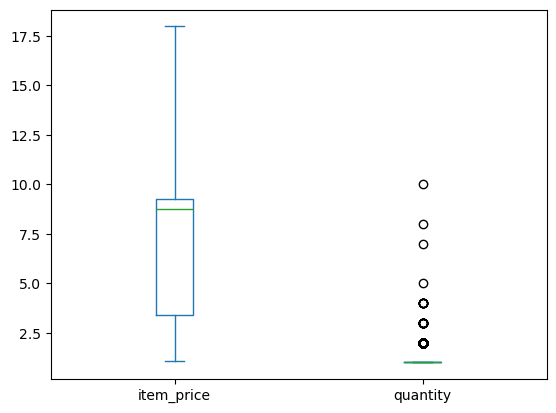

In [77]:
chipo[filtroMax][['item_price', 'quantity']].plot(kind='box')


Gráficas de Plotly, un poco mejores

In [78]:
import plotly.express as px # aquí nos estamos trayendo una librería, dónde tenemos que poner este import???????

px.box(chipo, x = 'item_price')

**Fijaos en una cosa, podemos ver las etiquetas de cada parte del diagrama de cajas y bigotes**

**¿Nos indican los mismos valores para los bigotes superior e inferior?**

**¿Por qué pasa esto?**

¿Y si le metemos más cosas a la función .box() de plotly.express?

In [79]:
px.box(chipo, x= 'quantity', y = 'item_price')

In [80]:
#px.histogram(chipo, x = 'item_price')
#

px.histogram(chipo, x = ['item_price', 'quantity'])


**¿Cuántos datos hemos perdido?**

### Utilizar funciones de agregación

In [81]:
chipo['item_name'].value_counts() # indsicxes uy tal

item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48


In [82]:
orders = chipo.order_id.value_counts().count()
orders

np.int64(1834)

In [83]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,<NA>,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,<NA>,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


## Renombrar columnas?

### Opción 1

In [84]:
display(chipo.head())

chipo = chipo.rename(columns={'quantity':'cantidah',
                              'item_price':'cohte'})
display(chipo.head())

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,<NA>,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,<NA>,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


,order_id,cantidah,item_name,choice_description,cohte
0,1,1,Chips and Fresh Tomato Salsa,<NA>,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,<NA>,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


### Opción 2

In [ ]:
display(chipo.head())

chipo.columns = ['id_pedido', 'cantidah', 'produtto', 'inform', 'cohte']

chipo.head()

In [ ]:
chipo['choice_description']

In [ ]:
chipo.info()

### ¿Cómo puedo seleccionar columnas renombradas?

In [ ]:

chipo = chipo.rename(columns = {'id_pedido':'Numero Pedido'})

display(chipo)

In [ ]:
chipo.id_pedido


## Funciones específicas para aplicar por registro

> No siempre nos servirán los filtros, o quizá queramos una función específica

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
ruta = '/content/drive/MyDrive/csv/chipotle.tsv'

chipo2 = pd.read_csv(ruta , sep = '\t')

In [ ]:
chipo2.head()

In [ ]:
chipo2['choice_description'][43]

In [ ]:
chipo2['item_price']

In [ ]:
float('$2.39 '[1:-1])

In [ ]:
dollarizer = lambda x: float(x[1:-1])


chipo2.item_price = chipo2.item_price.apply(dollarizer)

In [ ]:
display(chipo2)

In [ ]:
chipo2.info()

In [ ]:
chipo2[chipo2['item_price']>26]

## Group by

Vamos a jugar con el dataframe que teníamos antes:

In [ ]:
chipo.head()

In [ ]:
df1 = chipo[['Numero Pedido', 'cohte']].groupby(by=['Numero Pedido']).mean()
df1.plot()

**¿Tiene sentido esta agrupación?**

In [ ]:
chipo[['cantidah', 'cohte']].groupby(by=['cantidah']).mean()


In [ ]:
chipo.head()

In [ ]:
df2 = chipo.groupby(by=['Numero Pedido']).sum()#['cohte']
df2

In [ ]:
df3 = df2.groupby('cantidah').mean()
df3

In [ ]:
df3.plot()

In [ ]:
df2.sort_values('cantidah', ascending=False)

In [ ]:
chipo[chipo['Numero Pedido'] == 1443]

## Columnas a partir de otras

In [ ]:
chipo2.tail()

Crear columnas a partir de dos

In [ ]:
chipo2['totalRevenue'] = chipo2['quantity'] * chipo2['item_price']

In [ ]:
chipo2.head()

In [ ]:
chipo['moneda'] = chipo['cohte'].str[0]
chipo['precio'] = chipo['cohte'].str[1:].astype('float')

In [ ]:
chipo[chipo['inform'].isnull()]

In [ ]:
chipo.d

# JSON

In [ ]:
import pandas as pd

In [ ]:
# Create an example dataframe about a fictional army
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

In [ ]:
army = pd.DataFrame(data=raw_data)
army

In [ ]:
army.regiment

In [ ]:
army[["veterans", "deaths"]]

In [ ]:
army.columns

In [ ]:
army.iloc[1:8, 3:5]

In [ ]:
army.iloc[4:, :]

In [ ]:
army[army["deaths"] > 50]

## Data Wrangling...



In [ ]:
import numpy as np
import pandas as pd
import datetime

In [ ]:

data = pd.read_csv('wind.data', sep = "\s+", parse_dates = [[0,1,2]])
data.head(9)

In [ ]:
# Fechas > 2061¿¿¿¿¿...

# Funciones de corregir columnas...
def fix_century(x):
  year = x.year - 100 if x.year > 1989 else x.year
  return datetime.date(year, x.month, x.day)

# Otro apply :D
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_century)

# data.info()
data.head()

In [ ]:
# Transformamos Yr_Mo_Dy a tipo de datos fecha= datetime64
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])

#  'Yr_Mo_Dy' Cimo indice...
data = data.set_index('Yr_Mo_Dy')

data.head()
# data.info()

In [ ]:
#Cuantos valores  nulos hay?
data.isnull().sum()

In [ ]:
data.notnull().sum()

¿Qué estamos haciendo aquí?

In [ ]:
data.loc[data.index.month == 3].mean()


# New Section

In [ ]:
!pip install icalendar

In [ ]:
import pandas as pd
from icalendar import Calendar, Event
from datetime import datetime, timedelta
import pytz

# Cargar datos
file_path = '/content/Horario Curso 2024_2025.csv'  # Ajusta la ruta según sea necesario
data = pd.read_csv(file_path, delimiter=';')

# Preparar datos
data['FechaHora'] = pd.to_datetime(data['Fecha'] + ' ' + data['Hora'], dayfirst=True)
data['End'] = data['FechaHora'] + timedelta(hours=1)  # Suponiendo que cada sesión dura 1 hora
data['Date'] = data['FechaHora'].dt.date

# Ordenar datos
data.sort_values(by=['Asignatura', 'Grupo', 'FechaHora'], inplace=True)

# Función para agrupar clases consecutivas en el mismo día
def group_classes(df):
    grouped_data = []
    for (asignatura, grupo, date), group in df.groupby(['Asignatura', 'Grupo', 'Date']):
        # Crear eventos unificados
        start = group.iloc[0]['FechaHora']
        end = group.iloc[-1]['End']
        grouped_data.append({
            'Asignatura': asignatura,
            'Grupo': grupo,
            'Aula': group.iloc[0]['Aula'],
            'Titulación/Grupo': group.iloc[0]['Titulación/Grupo'],
            'Start': start,
            'End': end
        })
    return pd.DataFrame(grouped_data)

grouped = group_classes(data)

# Crear el calendario
cal = Calendar()
tz = pytz.timezone('Europe/Madrid')

# Añadir eventos
for index, row in grouped.iterrows():
    event = Event()
    start_datetime = tz.localize(row['Start'])
    end_datetime = tz.localize(row['End'])

    event.add('summary', f"{row['Asignatura']} ({row['Grupo']})")
    event.add('dtstart', start_datetime)
    event.add('dtend', end_datetime)
    event.add('location', 'Carrer de Guillem de Castro, 175 46008 València Valencia Spain')
    event.add('description', f"{row['Titulación/Grupo']} - {row['Asignatura']} - Aula: {row['Aula']}")

    cal.add_component(event)

# Guardar el calendario como archivo .ics
ics_file_path = '/content/Horario_Curso_2024_2025.ics'
with open(ics_file_path, 'wb') as f:
    f.write(cal.to_ical())

print("Calendario .ics creado exitosamente")


In [ ]:
import pandas as pd
from icalendar import Calendar, Event
from datetime import datetime, timedelta
import pytz

# Cargar datos
file_path = '/content/Horario Curso 2024_2025.csv'  # Ajusta la ruta según sea necesario
data = pd.read_csv(file_path, delimiter=';')

# Preparar datos
data['FechaHora'] = pd.to_datetime(data['Fecha'] + ' ' + data['Hora'], dayfirst=True)
data['End'] = data['FechaHora'] + timedelta(hours=1)  # Suponiendo que cada sesión dura 1 hora
data['Date'] = data['FechaHora'].dt.date

# Ordenar datos
data.sort_values(by=['Asignatura', 'Grupo', 'FechaHora'], inplace=True)

# Función para agrupar clases consecutivas en el mismo día
def group_classes(df):
    grouped_data = []
    for (asignatura, grupo, date), group in df.groupby(['Asignatura', 'Grupo', 'Date']):
        # Crear eventos unificados
        start = group.iloc[0]['FechaHora']
        end = group.iloc[-1]['End']
        grouped_data.append({
            'Asignatura': asignatura,
            'Grupo': grupo,
            'Aula': group.iloc[0]['Aula'],
            'Titulación/Grupo': group.iloc[0]['Titulación/Grupo'],
            'Start': start,
            'End': end,
            'SeriesID': f"{asignatura}_{grupo}"  # Añadir un identificador de serie
        })
    return pd.DataFrame(grouped_data)

grouped = group_classes(data)

# Crear el calendario
cal = Calendar()
tz = pytz.timezone('Europe/Madrid')

# Añadir eventos
for index, row in grouped.iterrows():
    event = Event()
    start_datetime = tz.localize(row['Start'])
    end_datetime = tz.localize(row['End'])

    event.add('summary', f"{row['Asignatura']} ({row['Grupo']})")
    event.add('dtstart', start_datetime)
    event.add('dtend', end_datetime)
    event.add('location', 'Carrer de Guillem de Castro, 175 46008 València Valencia Spain')
    event.add('description', f"{row['Titulación/Grupo']} - {row['Asignatura']} - Aula: {row['Aula']}")
    event.add('uid', f"{row['SeriesID']}-{index}@example.com")  # Añadir un identificador único para la serie de eventos

    cal.add_component(event)

# Guardar el calendario como archivo .ics
ics_file_path = '/content/Horario_Curso_2024_2025.ics'
with open(ics_file_path, 'wb') as f:
    f.write(cal.to_ical())

print("Calendario .ics creado exitosamente")
